# OCR with Python - pre-processing techiniques

# Importing the libraries

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Grayscale

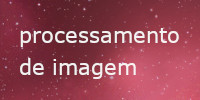

In [ ]:
img = cv2.imread('/content/img-process.jpg')
cv2_imshow(img)

In [ ]:
img.shape

(100, 200, 3)

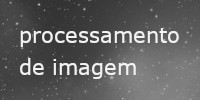

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
gray.shape

(100, 200)

# Thresholding

## Simple thresholding

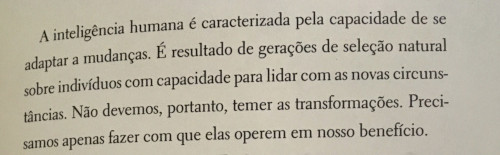

In [ ]:
img = cv2.imread('/content/page-book.jpg')
cv2_imshow(img)

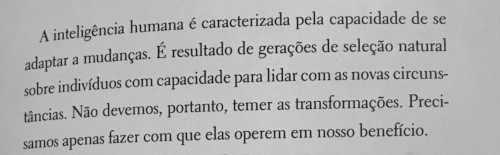

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

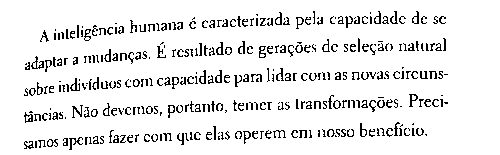

In [ ]:
value, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
value

127.0

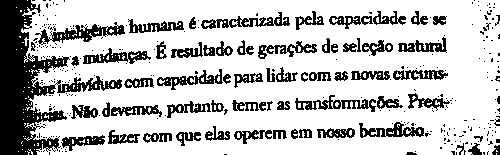

In [ ]:
value, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

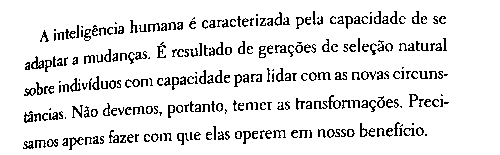

In [ ]:
value, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

## Otsu method

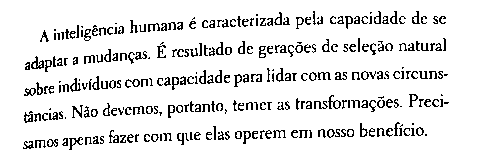

138.0


In [ ]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

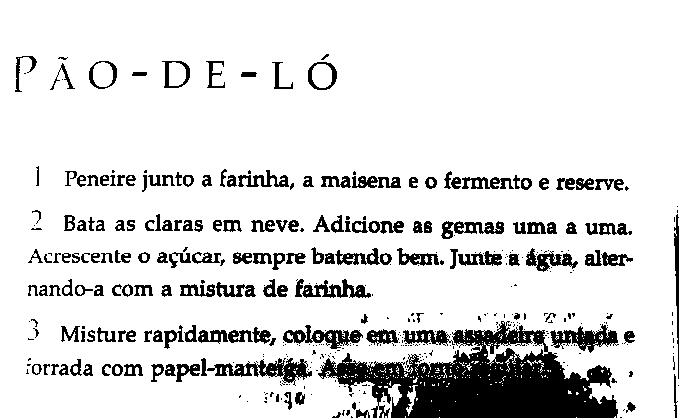

In [ ]:
img = cv2.imread('/content/recipe01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

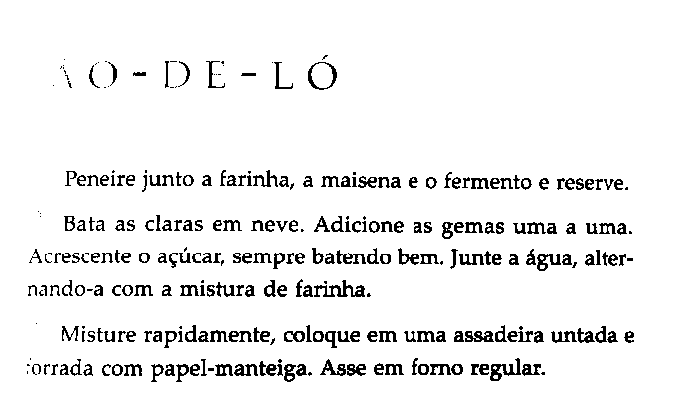

119.0


In [ ]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

## Adaptive Thresholding

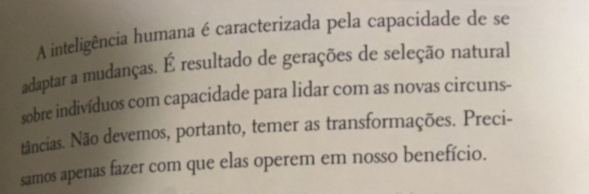

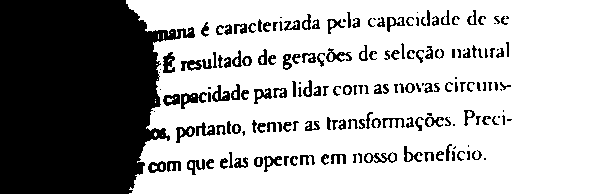

147.0


In [ ]:
img = cv2.imread('/content/book02.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(value)

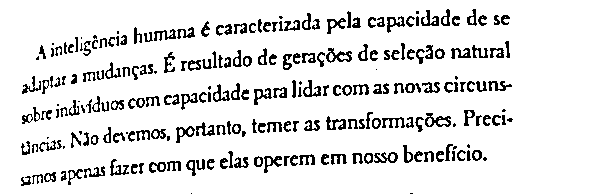

In [ ]:
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_average)

## Gaussian Adaptive Thresholding

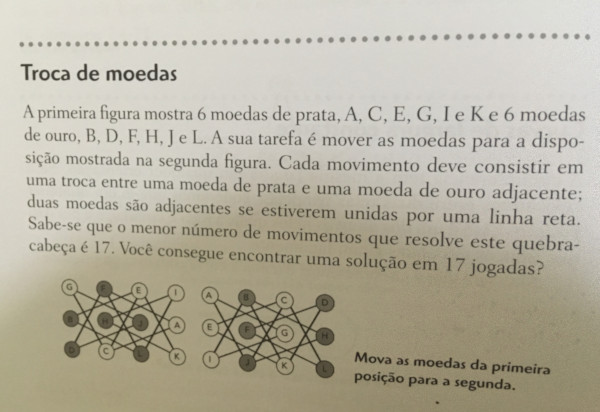

In [ ]:
img = cv2.imread('/content/book_adaptative.jpg')
cv2_imshow(img)

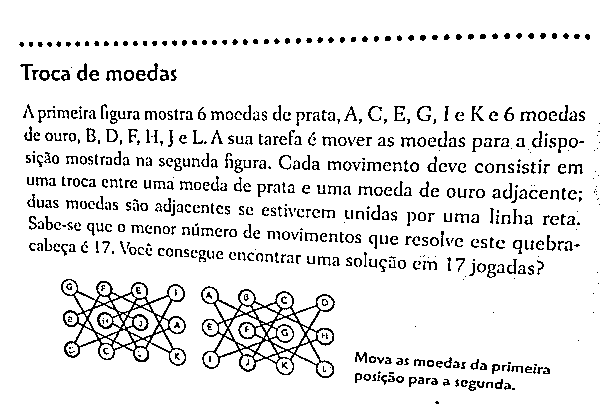

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_gaussian)

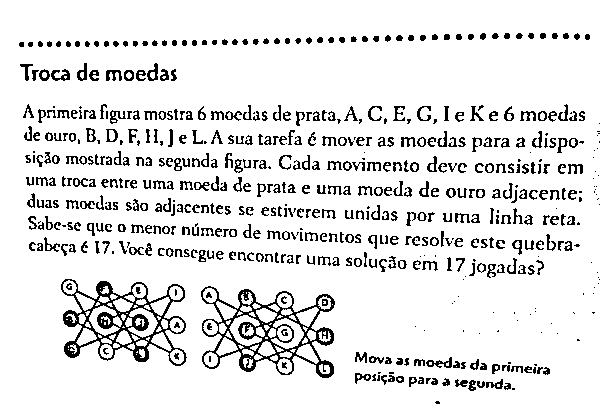

In [ ]:
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_average)

# Color inversion

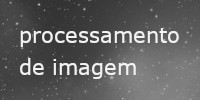

In [ ]:
img = cv2.imread('/content/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
img.shape, gray.shape

((100, 200, 3), (100, 200))

In [ ]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [ ]:
invert = 255 - gray

In [ ]:
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

In [ ]:
255 - 68

187

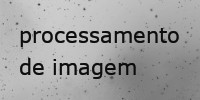

In [ ]:
cv2_imshow(invert)

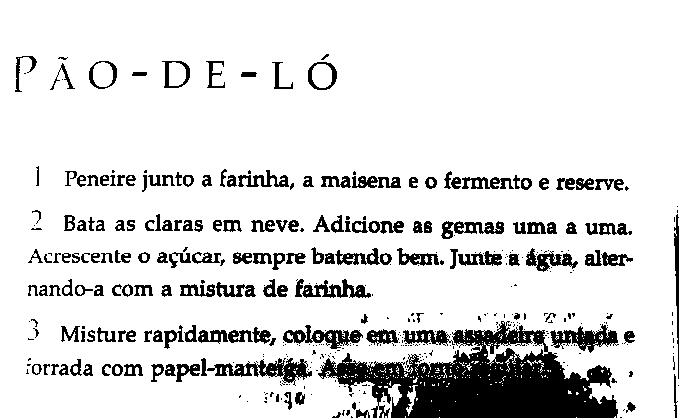

In [ ]:
cv2_imshow(thresh)

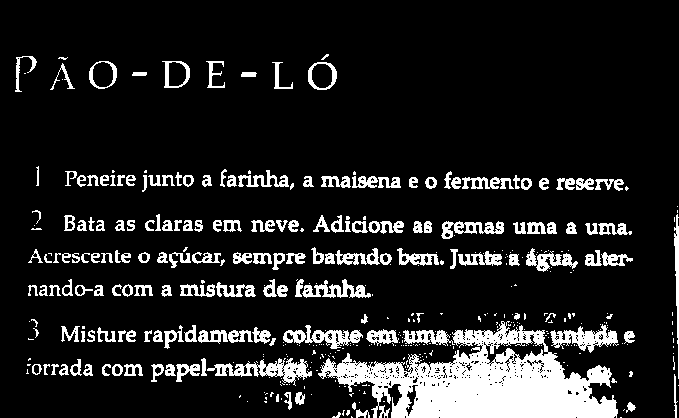

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

# Resizing

- INTER_NEAREST - a nearest neighbor interpolation. It is widely used because it is the fastest
- INTER_LINEAR - a bilinear interpolation (it's used by default), generally good for zooming in and out of images
- INTER_AREA - uses the pixel area ratio. May be a preferred method for image reduction as it provides good results 
- INTER_CUBIC - bicubic (4x4 neighboring pixels). It has better results
- INTER_LANCZOS4 - Lanczos interpolation (8x8 neighboring pixels). Among these algorithms, it is the one with the best quality results.

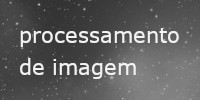

In [ ]:
cv2_imshow(gray)

In [ ]:
gray.shape

(100, 200)

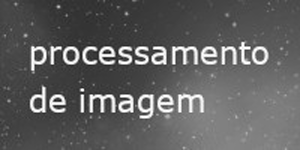

In [ ]:
increase = cv2.resize(gray, None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(increase)

In [ ]:
increase.shape

(150, 300)

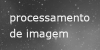

In [ ]:
decrease = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation=cv2.INTER_AREA)
cv2_imshow(decrease)

In [ ]:
decrease.shape

(50, 100)

# Morphological operations

## Erosion

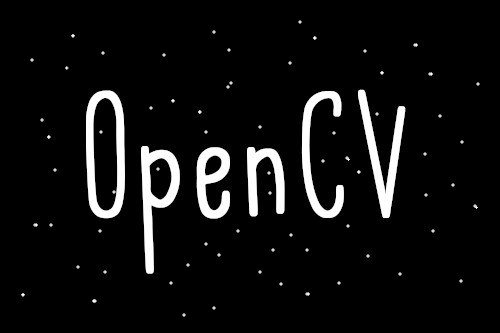

In [ ]:
img = cv2.imread('/content/text-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
np.ones((3,3), np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

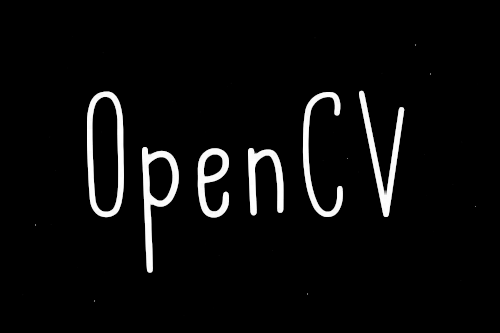

In [ ]:
erosion = cv2.erode(gray, np.ones((3,3), np.uint8))
cv2_imshow(erosion)

## Dilation

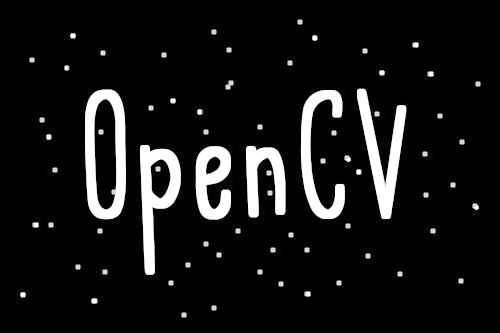

In [ ]:
dilation = cv2.dilate(gray, np.ones((3,3), np.uint8))
cv2_imshow(dilation)

## Opening

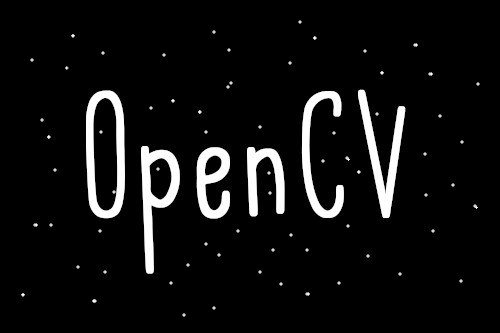

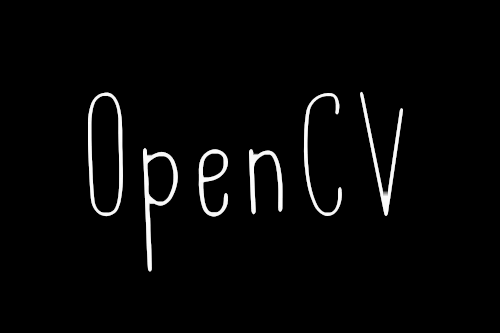

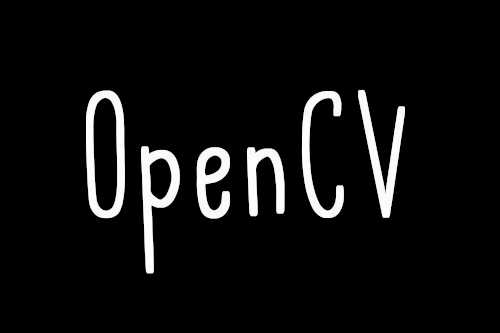

In [ ]:
erosion = cv2.erode(gray, np.ones((5,5), np.uint8))
opening = cv2.dilate(erosion, np.ones((5,5), np.uint8))
cv2_imshow(gray)
cv2_imshow(erosion)
cv2_imshow(opening)

## Closing

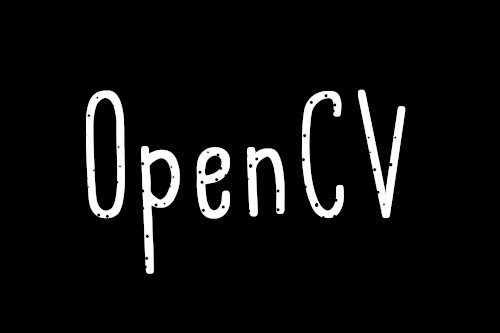

In [ ]:
img = cv2.imread('/content/text-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

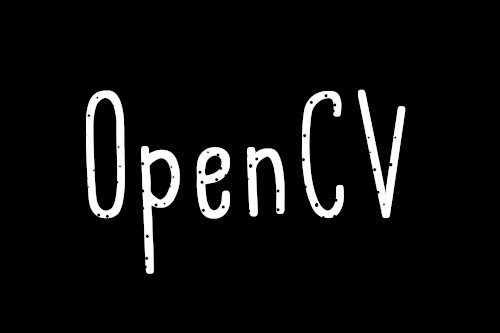

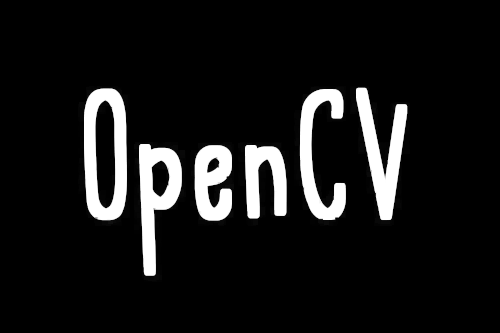

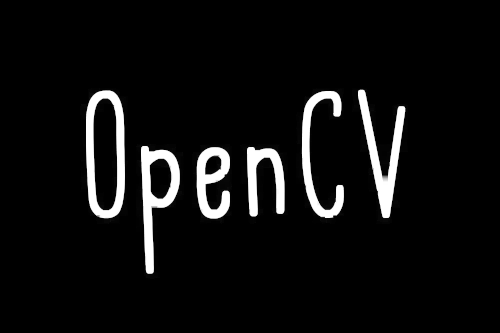

In [ ]:
dilation = cv2.dilate(gray, np.ones((5,5), np.uint8))
closing = cv2.erode(dilation, np.ones((5,5), np.uint8))
cv2_imshow(gray)
cv2_imshow(dilation)
cv2_imshow(closing)

# Noise removal

## Average blur

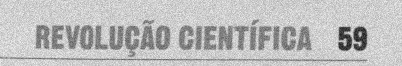

In [ ]:
img = cv2.imread('/content/test_noise.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

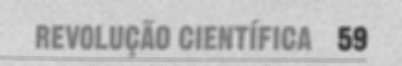

In [ ]:
average_blur = cv2.blur(gray, (5,5))
cv2_imshow(average_blur)

## Gaussian blur


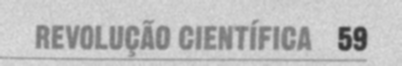

In [ ]:
gaussian_blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2_imshow(gaussian_blur)

## Median blur

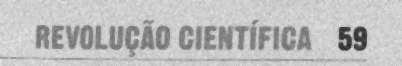

In [ ]:
median_blur = cv2.medianBlur(gray, 3)
cv2_imshow(median_blur)

## Bilateral filter

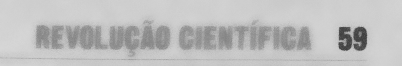

In [ ]:
bilateral_filter = cv2.bilateralFilter(gray, 15, 55, 45)
cv2_imshow(bilateral_filter)

# Text detection

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(average_blur, lang = 'por', config=config_tesseract)
print(text)

In [ ]:
text = pytesseract.image_to_string(median_blur, lang = 'por', config=config_tesseract)
print(text)

— REVOLUÇÃO CIENTÍFICA 59



# Homework

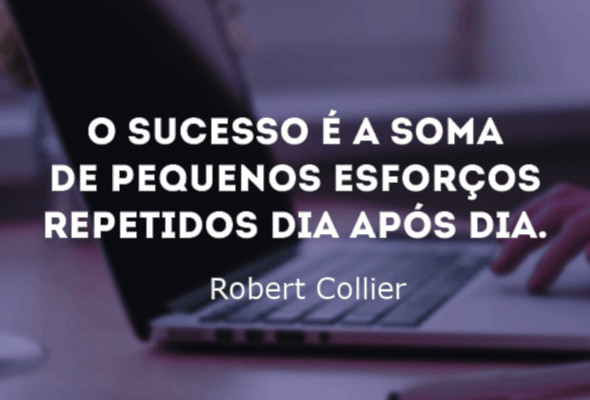

In [ ]:
img = cv2.imread('/content/sentence.jpg')
cv2_imshow(img)

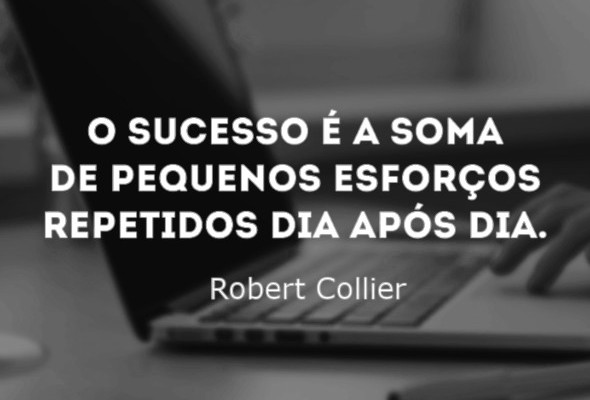

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

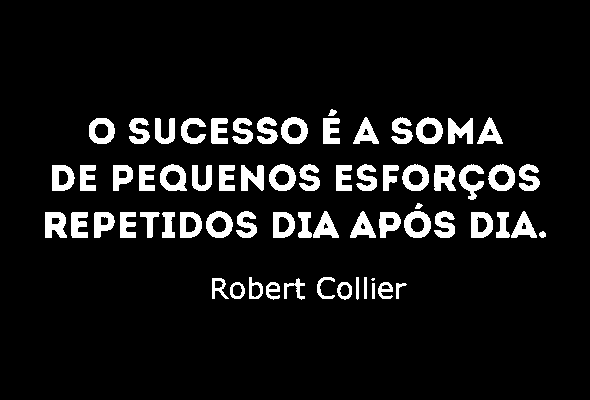

145.0


In [ ]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(thresh)
print(value)

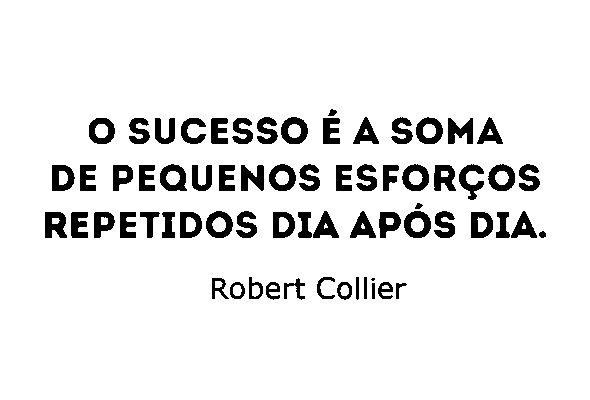

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

In [ ]:
print(pytesseract.image_to_string(thresh, lang = 'por', config=config_tesseract))

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

